# CHALLENGE: Smart Pricer 



### Imports and loading csv





In [5]:
import pandas as pd
import numpy as np
import seaborn as sns


In [6]:
!ls

Challenge-Smart_pricer.ipynb  notebooks  README.md	   setup.py
Makefile		      output	 requirements.txt  sp_coding_challenge
MANIFEST.in		      raw_data	 scripts	   tests


In [7]:
# loading dataframe
df = pd.read_csv("raw_data/data_export.csv", delimiter=";")

In [8]:
#df.set_index("YRES_ID", inplace= True)
df


,YRES_ID,ticket_types,person_types,event_date,channel,preiscode,price,purchase_dt,land
0,0,B,senior,2019-03-15,KASSA3,ffp2,"10,5",12.03.2019 17:01:46,Deutschland
1,1,B,adult,2019-02-27,webshop_3,ffp�,"10,5",25.02.2019 06:07:42,Deutschland
2,2,B,senior,2019-02-21,KASSA3,ffp2,"18,6",14.02.2019 00:26:15,Deutschland
3,3,B,senior,2018-12-13,KASSA3,ffp�,"18,6",08.12.2018 16:51:50,Deutschland
4,4,B,senior,2018-12-09,webshop_3,ffp�,"9,0",01.12.2018 14:12:03,Deutschland
...,...,...,...,...,...,...,...,...,...
95,95,B,child,2018-12-21,KASSA3,ffp2,"85,0",16.12.2018 07:11:26,Deutschland
96,96,C,senior,2019-02-09,webshop_3,ffp2,"18,6",01.02.2019 00:00:54,Deutschland
97,97,A,senior,2019-03-09,KASSA1,ffp2,"10,5",28.02.2019 18:11:06,Deutschland
98,98,B,child,2019-03-15,KASSA1,ffp2,"14,0",08.03.2019 20:04:31,Deutschland


### Data exploration 


In [9]:
df.isnull().sum()
#checking for missing values

YRES_ID         0
ticket_types    0
person_types    0
event_date      0
channel         0
preiscode       0
price           0
purchase_dt     0
land            0
dtype: int64

In [10]:
df.dtypes
# types of the columns

YRES_ID          int64
ticket_types    object
person_types    object
event_date      object
channel         object
preiscode       object
price           object
purchase_dt     object
land            object
dtype: object

In [11]:
df["land"].unique()

array(['Deutschland'], dtype=object)

In [12]:
df["ticket_types"].unique()


array(['B', 'C', 'A'], dtype=object)

In [13]:
df["person_types"].unique()


array(['senior', 'adult', 'child'], dtype=object)

In [14]:
df["channel"].unique()

array(['KASSA3', 'webshop_3', 'KASSA1'], dtype=object)

In [15]:
df["price"].min()

'10,5'

### fixing the types for the columns "price" , "purchase_dt" and  "event_date"

In [16]:
df["purchase_dt"] = pd.to_datetime(df["purchase_dt"])

In [17]:
df["event_date"] = pd.to_datetime(df["event_date"])

In [18]:
#Replacing the comma with dot
df["price"] = df["price"].str.replace(',','.')

In [19]:
df["price"] = pd.to_numeric(df["price"])

In [20]:
df.dtypes

YRES_ID                  int64
ticket_types            object
person_types            object
event_date      datetime64[ns]
channel                 object
preiscode               object
price                  float64
purchase_dt     datetime64[ns]
land                    object
dtype: object

In [21]:
df["price"].min()

9.0

In [22]:
df["price"].max()

85.0

In [23]:
df.head(3)


,YRES_ID,ticket_types,person_types,event_date,channel,preiscode,price,purchase_dt,land
0,0,B,senior,2019-03-15,KASSA3,ffp2,10.5,2019-12-03 17:01:46,Deutschland
1,1,B,adult,2019-02-27,webshop_3,ffp�,10.5,2019-02-25 06:07:42,Deutschland
2,2,B,senior,2019-02-21,KASSA3,ffp2,18.6,2019-02-14 00:26:15,Deutschland


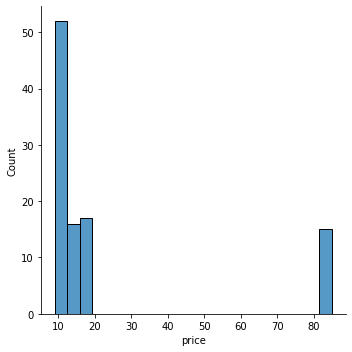

In [24]:
sns.displot(data= df, x="price")



In [25]:
df.columns

Index(['YRES_ID', 'ticket_types', 'person_types', 'event_date', 'channel',
       'preiscode', 'price', 'purchase_dt', 'land'],
      dtype='object')

### Tickets


In [26]:
df["ticket_types"].value_counts()


A    35
C    33
B    32
Name: ticket_types, dtype: int64

In [27]:
df_tickets= df.groupby(by=["ticket_types"])["price"].agg(['sum','count'])
df_tickets


,sum,count
ticket_types,,
A,1019.4,35
B,649.9,32
C,703.9,33


<AxesSubplot:xlabel='ticket_types'>

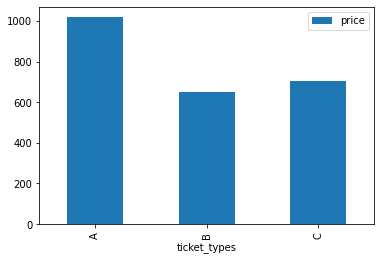

In [28]:
df.groupby(by=["ticket_types"]).sum()[["price"]].plot(kind="bar")

### Person_types


In [29]:
df_persons = df.groupby(by=["person_types"])["price"].agg(['sum','count'])
df_persons


,sum,count
person_types,,
adult,1014.4,34
child,936.6,40
senior,422.2,26


### Channel




In [30]:
df_channels = df.groupby(by=["channel"])["price"].agg(['sum','count'])

df_channels

,sum,count
channel,,
KASSA1,753.9,31
KASSA3,933.9,37
webshop_3,685.4,32


### Preiscode


In [31]:
df_preiscodes = df.groupby(by=["preiscode"])["price"].agg(['sum','count'])
df_preiscodes

,sum,count
preiscode,,
asdfg,614.9,25
ffp2,1075.3,44
ffp�,683.0,31


### Year

In [32]:
# df['purchase_year'] = pd.DatetimeIndex(df['event_date']).year
# df_event_year = df.groupby(by=["event_year"])["price"].agg(['sum','count'])
# df_event_year


In [33]:
df['year'] = pd.DatetimeIndex(df['purchase_dt']).year

In [34]:
df_year = df.groupby(by=["year"])["price"].agg(['sum','count'])

In [35]:
df_year

,sum,count
year,,
2018,900.3,42
2019,1472.9,58


### Month


In [36]:
## purchasing month 
df['purchase_month'] = pd.DatetimeIndex(df['purchase_dt']).month
df_purchase_month = df.groupby(by=["purchase_month"])["price"].agg(['sum','count'])
df_purchase_month

,sum,count
purchase_month,,
1,318.8,19
2,347.8,16
3,166.1,7
4,18.0,2
5,109.5,3
6,53.1,4
7,12.0,1
8,213.1,5
9,104.5,3


In [37]:
df['month'] = pd.DatetimeIndex(df['event_date']).month
df_month = df.groupby(by=["month"])["price"].agg(['sum','count'])
df_month

,sum,count
month,,
1,387.8,19
2,646.5,21
3,463.8,19
4,12.0,1
11,293.8,18
12,569.3,22


In [38]:
df_channels.to_csv("output/channels.csv")
df_persons.to_csv("output/persons.csv")
df_preiscodes.to_csv("output/preiscodes.csv")
df_tickets.to_csv("output/tickets.csv")
df_year.to_csv("output/year.csv")
df_month.to_csv("output/month.csv")
df_purchase_month.to_csv("output/purchase_month.csv")

## Part 2 overview of the revenue generated per date


In [39]:
df_date = df.groupby(by=["year","month"])["price"].agg(['sum','count'])

In [40]:
df_date.rename({'sum': 'revenue', 'count': 'numer_of_tickets'}, axis=1, inplace=True)


In [41]:
df_date

revenue  numer_of_tickets
year month                           
2018 1         37.2                 2
     11       293.8                18
     12       569.3                22
2019 1        350.6                17
     2        646.5                21
     3        463.8                19
     4         12.0                 1

In [42]:
# saving the file under the name fingerpring
df_date.to_csv("output/fingerprint.csv")

In [43]:
# It turns out the most popular months for the events are winter months. they return the most revenue

### Full Dataset sorted by year and month



In [44]:
df.set_index(["year","month"], inplace = True)

In [45]:
df.sort_index()

YRES_ID ticket_types person_types event_date    channel preiscode  \
year month                                                                      
2018 1           66            B       senior 2019-01-03     KASSA3      ffp�   
     1           74            B        adult 2019-01-07     KASSA3      ffp�   
     11           5            C        child 2018-11-29  webshop_3     asdfg   
     11           7            A        child 2018-11-23     KASSA3      ffp�   
     11          15            C        child 2018-11-05     KASSA1      ffp2   
...             ...          ...          ...        ...        ...       ...   
2019 3           90            C        adult 2019-03-21  webshop_3     asdfg   
     3           97            A       senior 2019-03-09     KASSA1      ffp2   
     3           98            B        child 2019-03-15     KASSA1      ffp2   
     3           99            C       senior 2019-03-17     KASSA3      ffp2   
     4           14            A       senior 2019-04-01     KASSA3      ffp�   

            price         purchase_dt         land  purchase_month  
year month                                                          
2018 1       18.6 2018-12-27 23:33:00  Deutschland              12  
     1       18.6 2018-12-29 01:02:13  Deutschland              12  
     11      14.0 2018-11-27 20:15:03  Deutschland              11  
     11      85.0 2018-11-20 09:52:52  Deutschland              11  
     11       9.0 2018-02-11 11:33:49  Deutschland               2  
...           ...                 ...          ...             ...  
2019 3       85.0 2019-11-03 07:35:25  Deutschland              11  
     3       10.5 2019-02-28 18:11:06  Deutschland               2  
     3       14.0 2019-08-03 20:04:31  Deutschland               8  
     3       12.0 2019-10-03 16:04:01  Deutschland              10  
     4       12.0 2019-03-27 05:50:34  Deutschland               3  

[100 rows x 10 columns]

### Extra analysis


<AxesSubplot:xlabel='purchase_month', ylabel='count'>

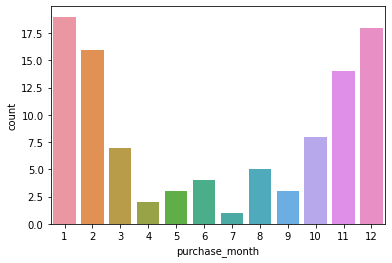

In [46]:
sns.countplot(data = df, x="purchase_month")


<AxesSubplot:xlabel='purchase_month', ylabel='count'>

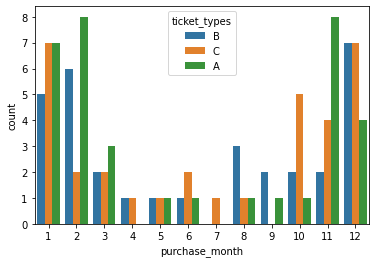

In [47]:
sns.countplot(data = df, x="purchase_month", hue="ticket_types")

In [48]:
#sns.countplot(data = df_month, x="sum")




<AxesSubplot:xlabel='month'>

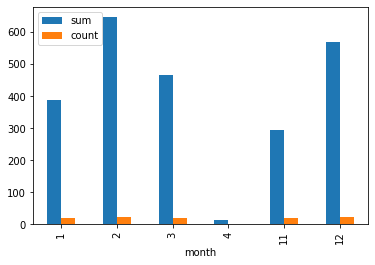

In [49]:
df_month.plot(kind = "bar")